Deny Ahmad Sofyan

1301194274

IOT UTS

#LIBRARY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import butter, filtfilt, find_peaks

#IMPORT DATASET

In [ ]:
url = 'https://raw.githubusercontent.com/D3ny4hmad/IOT/main/Linear%20Acceleration2.csv'
data = pd.read_csv(url)
data

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.049308,-0.004259,0.022413,-0.040339
1,0.059410,-0.013334,0.010101,-0.028830
2,0.069541,-0.012666,0.009852,-0.035077
3,0.079704,-0.018373,0.010474,-0.045901
4,0.089836,-0.006606,0.019900,-0.069006
...,...,...,...,...
5896,59.970864,-0.019538,0.023440,-0.256114
5897,59.981026,0.030020,0.010474,-0.170938
5898,59.991188,0.088652,0.027662,0.278892
5899,60.001351,0.109566,0.045239,0.294453


#DIRECT METHOD

##Starting Point

In [ ]:
#sum x,y,z
sumx = sum(data['Linear Acceleration x (m/s^2)'])
sumy = sum(data['Linear Acceleration y (m/s^2)'])
sumz = sum(data['Linear Acceleration z (m/s^2)'])

#len x,y,z
lenx = len(data['Linear Acceleration x (m/s^2)'])
leny = len(data['Linear Acceleration y (m/s^2)'])
lenz = len(data['Linear Acceleration z (m/s^2)'])

#dif x,y,z
difx = sumx / lenx
dify = sumy / leny
difz = sumz / lenz

#looping
for i in data:
  datax = data['Linear Acceleration x (m/s^2)'] - difx
  datay = data['Linear Acceleration y (m/s^2)'] - dify
  dataz = data['Linear Acceleration z (m/s^2)'] - difz

databaru = data
databaru['Linear Acceleration x (m/s^2)'] = datax
databaru['Linear Acceleration y (m/s^2)'] = datay
databaru['Linear Acceleration z (m/s^2)'] = dataz

databaru

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.049308,-0.006719,-0.010378,-0.041580
1,0.059410,-0.015794,-0.022690,-0.030070
2,0.069541,-0.015125,-0.022939,-0.036317
3,0.079704,-0.020833,-0.022317,-0.047141
4,0.089836,-0.009065,-0.012890,-0.070246
...,...,...,...,...
5896,59.970864,-0.021997,-0.009350,-0.257354
5897,59.981026,0.027560,-0.022317,-0.172178
5898,59.991188,0.086192,-0.005129,0.277651
5899,60.001351,0.107107,0.012448,0.293213


##Plot

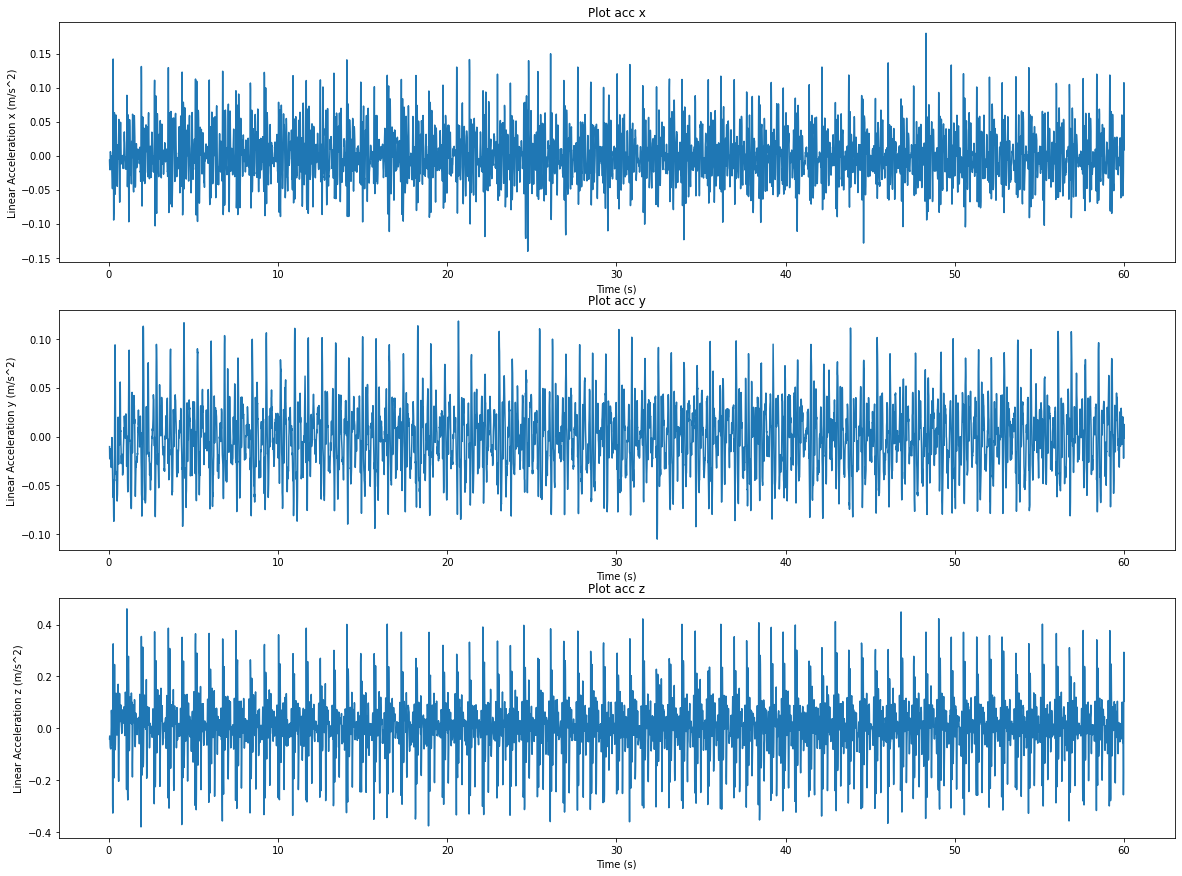

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)

plt.subplot(3, 1, 1)
plt.plot(data['Time (s)'], datax)
plt.title("Plot acc x")
plt.ylabel('Linear Acceleration x (m/s^2)')
plt.xlabel('Time (s)')

plt.subplot(3, 1, 2)
plt.plot(data['Time (s)'],datay)
plt.title("Plot acc y")
plt.ylabel('Linear Acceleration y (m/s^2)')
plt.xlabel('Time (s)')

plt.subplot(3, 1, 3)
plt.plot(data['Time (s)'],dataz)
plt.title("Plot acc z")
plt.ylabel('Linear Acceleration z (m/s^2)')
plt.xlabel('Time (s)')

plt.show()

#INKLINASI METHOD

##Equality

In [ ]:
ink = np.arctan2(datax,dataz)
databaru['RHO'] = ink

##Plot RHO

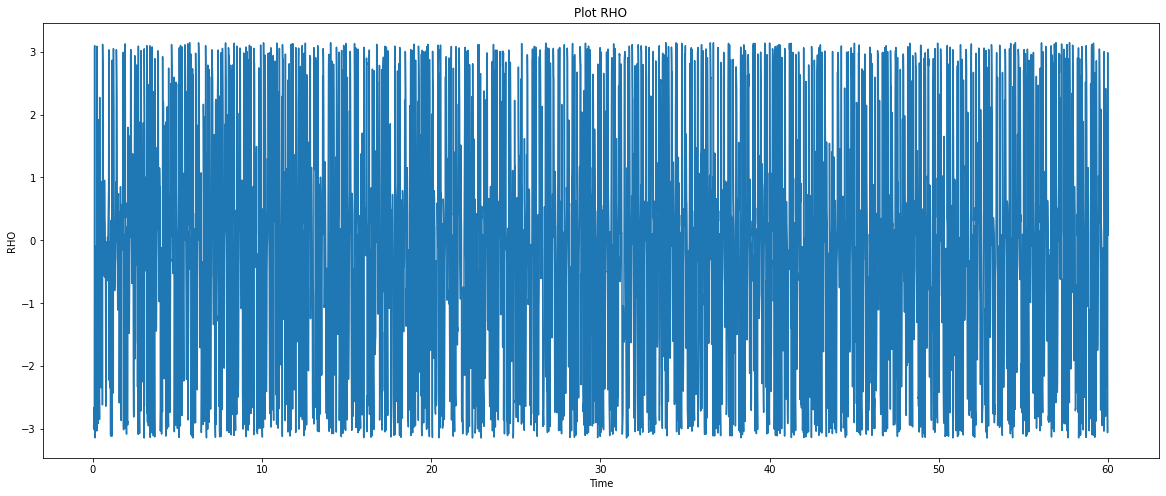

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.xlabel("Time")
plt.ylabel("RHO")
plt.title("Plot RHO")

plt.plot(databaru['Time (s)'], databaru['RHO'])

##Plot Perbandingan

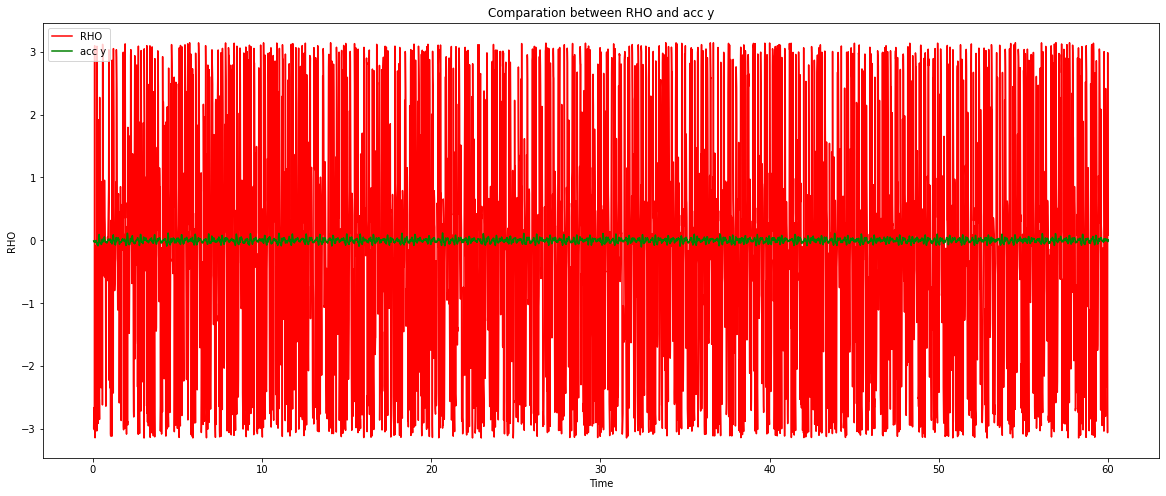

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(databaru['Time (s)'],databaru['RHO'], color='r', label='RHO' )
plt.plot(databaru['Time (s)'],databaru['Linear Acceleration y (m/s^2)'], color='g', label='acc y' )

plt.xlabel("Time")
plt.ylabel("RHO")
plt.title("Comparation between RHO and acc y")

plt.legend()

plt.show()

#LPF

##Method

In [ ]:
order = 6
fs = 100    # sample rate
fc = 0.8     # nilai cutoff

def lpf(databaru, fc, fs, order):
    nyq = 0.5 * fs
    nfc = fc / nyq
    b, a = butter(order, nfc, btype='low', analog=False)
    res = filtfilt(b, a, databaru)
    return res

lpf_x = lpf(databaru['Linear Acceleration x (m/s^2)'],fc,fs,order)
lpf_y = lpf(databaru['Linear Acceleration y (m/s^2)'],fc,fs,order)
lpf_z = lpf(databaru['Linear Acceleration z (m/s^2)'],fc,fs,order)
lpf_rho = lpf(databaru['RHO'],fc,fs,order)

databaru['lpf_rho'] = lpf_rho
databaru['lpf_x'] = lpf_x
databaru['lpf_y'] = lpf_y
databaru['lpf_z'] = lpf_z

##LPF Inklinasi

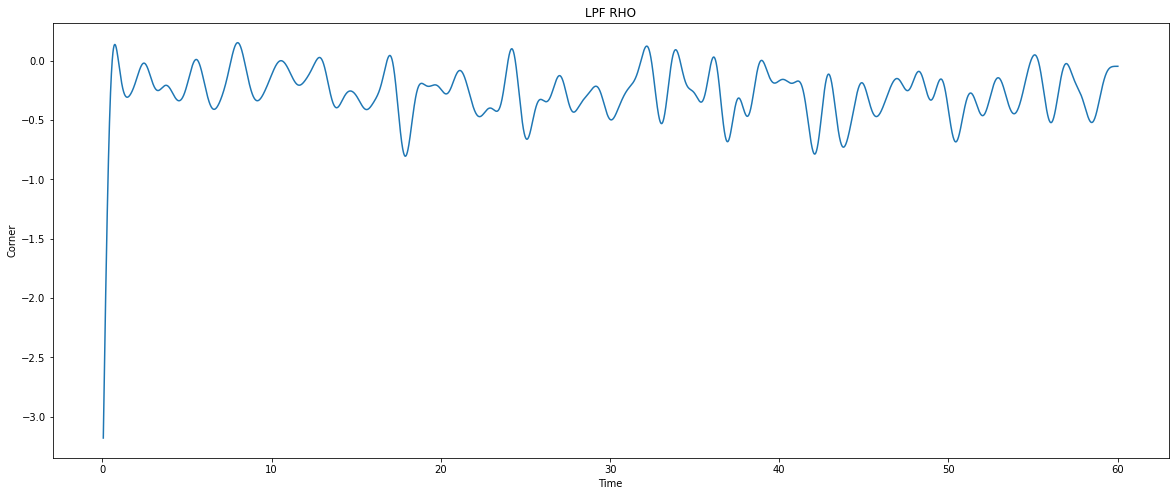

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.xlabel("Time")
plt.ylabel("Corner")
plt.title("LPF RHO")

plt.plot(databaru['Time (s)'], databaru['lpf_rho'])

##LPF Direct

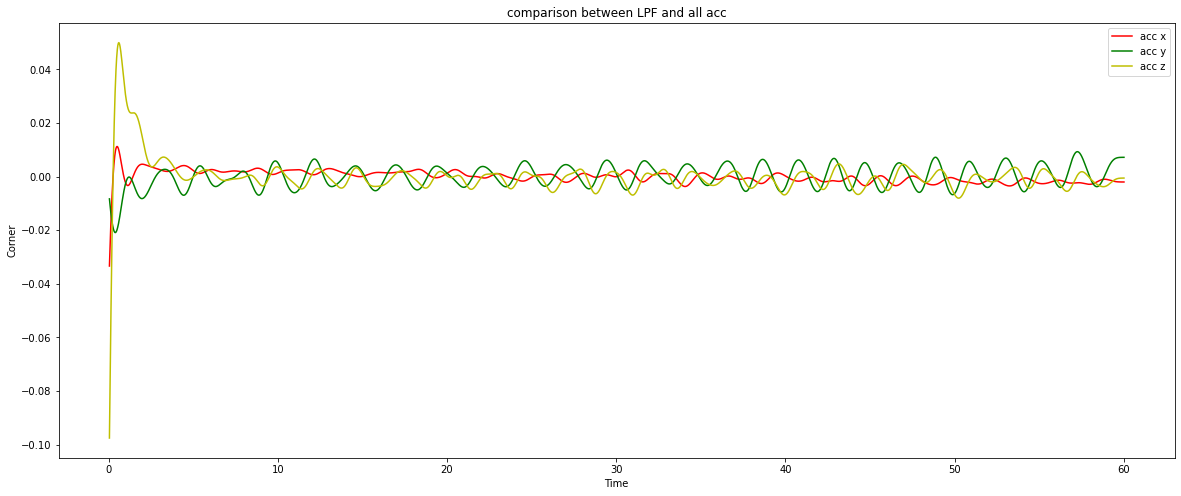

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(databaru['Time (s)'],databaru['lpf_x'], color='r', label='acc x' )
plt.plot(databaru['Time (s)'],databaru['lpf_y'], color='g', label='acc y' )
plt.plot(databaru['Time (s)'],databaru['lpf_z'], color='y', label='acc z' )

plt.xlabel("Time")
plt.ylabel("Corner")
plt.title("comparison between LPF and all acc")

plt.legend()

plt.show()

#RESPIRATION RATE

##Find Peeks

In [ ]:
peek_rho, _ = find_peaks(lpf_rho, height=0)
peek_x, _ = find_peaks(lpf_x, height=0)
peek_y, _ = find_peaks(lpf_y, height=0)
peek_z, _ = find_peaks(lpf_z, height=0)

##Direct Peeks

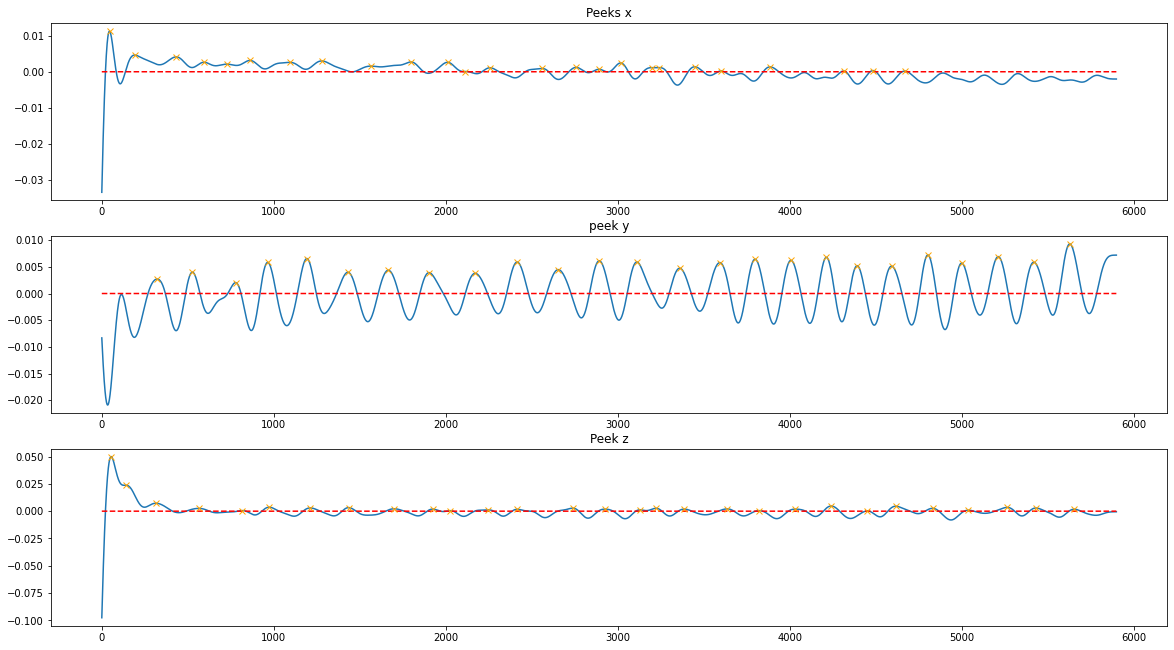

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)

plt.subplot(4, 1, 2)
plt.plot(lpf_x)
plt.plot(np.zeros_like(lpf_x), "--", color="red" )
plt.plot(peek_x, lpf_x[peek_x], "x", color="orange")
plt.title("Peeks x")

plt.subplot(4, 1, 3)
plt.plot(lpf_y)
plt.plot(np.zeros_like(lpf_y), "--", color="red" )
plt.plot(peek_y, lpf_y[peek_y], "x", color="orange")
plt.title("peek y")

plt.subplot(4, 1, 4)
plt.plot(lpf_z)
plt.plot(np.zeros_like(lpf_z), "--", color="red" )
plt.plot(peek_z, lpf_z[peek_z], "x", color="orange")
plt.title("Peek z")

plt.show()

##Inklanasi Peeks

Text(0.5, 1.0, 'Peeks RHO')

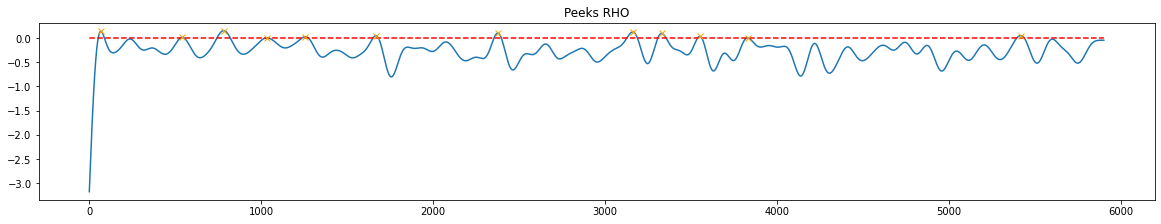

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)

plt.subplot(4, 1, 1)
plt.plot(lpf_rho)
plt.plot(np.zeros_like(lpf_rho), "--", color="red" )
plt.plot(peek_rho, lpf_rho[peek_rho], "x", color="orange")
plt.title("Peeks RHO")

##Total Peeks

In [ ]:
allprho = len(peek_rho)
allx = len(peek_x)
ally = len(peek_y)
allz = len(peek_z)

print('Total Peeks pada rho : ', allprho)
print('Total Peeks pada x   : ', allx)
print('Total Peeks pada y   : ', ally)
print('Total Peeks pada z   : ', allz)

Total Peeks pada rho :  12
Total Peeks pada x   :  25
Total Peeks pada y   :  25
Total Peeks pada z   :  29
